#  Linear Networks & Classification

###  **DSBA 6165: AI & Deep Learning**
### Minwoo "Jake" Lee

## Goal

The goal of this lab activity is practicing to build a deep neural network class while variating different DNN components. For the practice, we use Energy efficiency Data Set dataset from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/). 

In this lab, we are building deep neural network by subclassing keras.Model so we can variate the different parameterized contruction. 

## Loading Data

Let us first import the libraries we are going to use. TensorFlow for DL models, matplotlib for plotting data/results, numpy and pandas for data handling. 

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
print("TF version:", tf.__version__)
import matplotlib.pyplot as plt   
import numpy as np
import pandas as pd
import seaborn as sns
from keras.utils import to_categorical, plot_model
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout

TF version: 2.15.0


In [ ]:
!pip3 install openpyxl


[notice] A new release of pip is available: 23.1.2 -> 23.3.2
[notice] To update, run: pip3 install --upgrade pip


### Energy Efficiency Dataset

You can download [ENB2012_data.xlsx](https://archive.ics.uci.edu/ml/machine-learning-databases/00242/ENB2012_data.xlsx). Click the link and take a look at the data before starting to work the following TODOs. 


<img src="https://miro.medium.com/max/1400/0*1TwLXhauaGFElF4c.webp" width=450 />


|  |  |  |  |  |  |
|---|---|---|---|---|---|
| Data Set Characteristics:&nbsp;&nbsp; | Multivariate | Number of Instances: | 768 | Area: | Computer |
| Attribute Characteristics: | Integer, Real | Number of Attributes: | 8 | Date Donated | 2012-11-30 |
| Associated Tasks: | Classification, Regression | Missing Values? | N/A | Number of Web Hits: | 447329 |


#### Data Set Information:

We perform energy analysis using 12 different building shapes simulated in Ecotect. The buildings differ with respect to the glazing area, the glazing area distribution, and the orientation, amongst other parameters. We simulate various settings as functions of the afore-mentioned characteristics to obtain 768 building shapes. The dataset comprises 768 samples and 8 features, aiming to predict two real valued responses. It can also be used as a multi-class classification problem if the response is rounded to the nearest integer.


#### Attribute Information:

The dataset contains eight attributes (or features, denoted by X1...X8) and two responses (or outcomes, denoted by y1 and y2). The aim is to use the eight features to predict each of the two responses.

Specifically:
* X1 Relative Compactness
* X2 Surface Area
* X3 Wall Area
* X4 Roof Area
* X5 Overall Height
* X6 Orientation
* X7 Glazing Area
* X8 Glazing Area Distribution
* y1 Heating Load
* y2 Cooling Load


#### Relevant Papers:

A. Tsanas, A. Xifara: 'Accurate quantitative estimation of energy performance of residential buildings using statistical machine learning tools', Energy and Buildings, Vol. 49, pp. 560-567, 2012



### TODO1
1. Copy the Energy Efficiency Dataset url from above and define the variable `data_url`.
1. Load the Energy Efficiency Dataset with the `data_url` provided above and store the output into `dfenergy` using pandas `read_csv`.
    1. Hint: Make sure to include the data url variable.
    1. Hint: Use the read_excel reference here: [link](https://pandas.pydata.org/docs/reference/api/pandas.read_excel.html)
    1. Hint: Include colnames when loading the data.

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution,Heating Load,Cooling Load
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28
...,...,...,...,...,...,...,...,...,...,...
763,0.64,784.0,343.0,220.50,3.5,5,0.4,5,17.88,21.40
764,0.62,808.5,367.5,220.50,3.5,2,0.4,5,16.54,16.88
765,0.62,808.5,367.5,220.50,3.5,3,0.4,5,16.44,17.11
766,0.62,808.5,367.5,220.50,3.5,4,0.4,5,16.48,16.61


## Visualize the data
 Seaborn, a visualization library, helps to visualize data with many plotting functions. To understand how variables in a dataset are related to one another and how that relationship is dependent on other variables, we can run visual analysis. This helps to visualize the trends and identify various patterns in the dataset.
 
### TODO 2
1. Using the seaborn `pairplot` plot, visualize the relationship between the independent varaibles. 
  * Here, we want to plot distributions of each class, so use `dfenergy`.


  

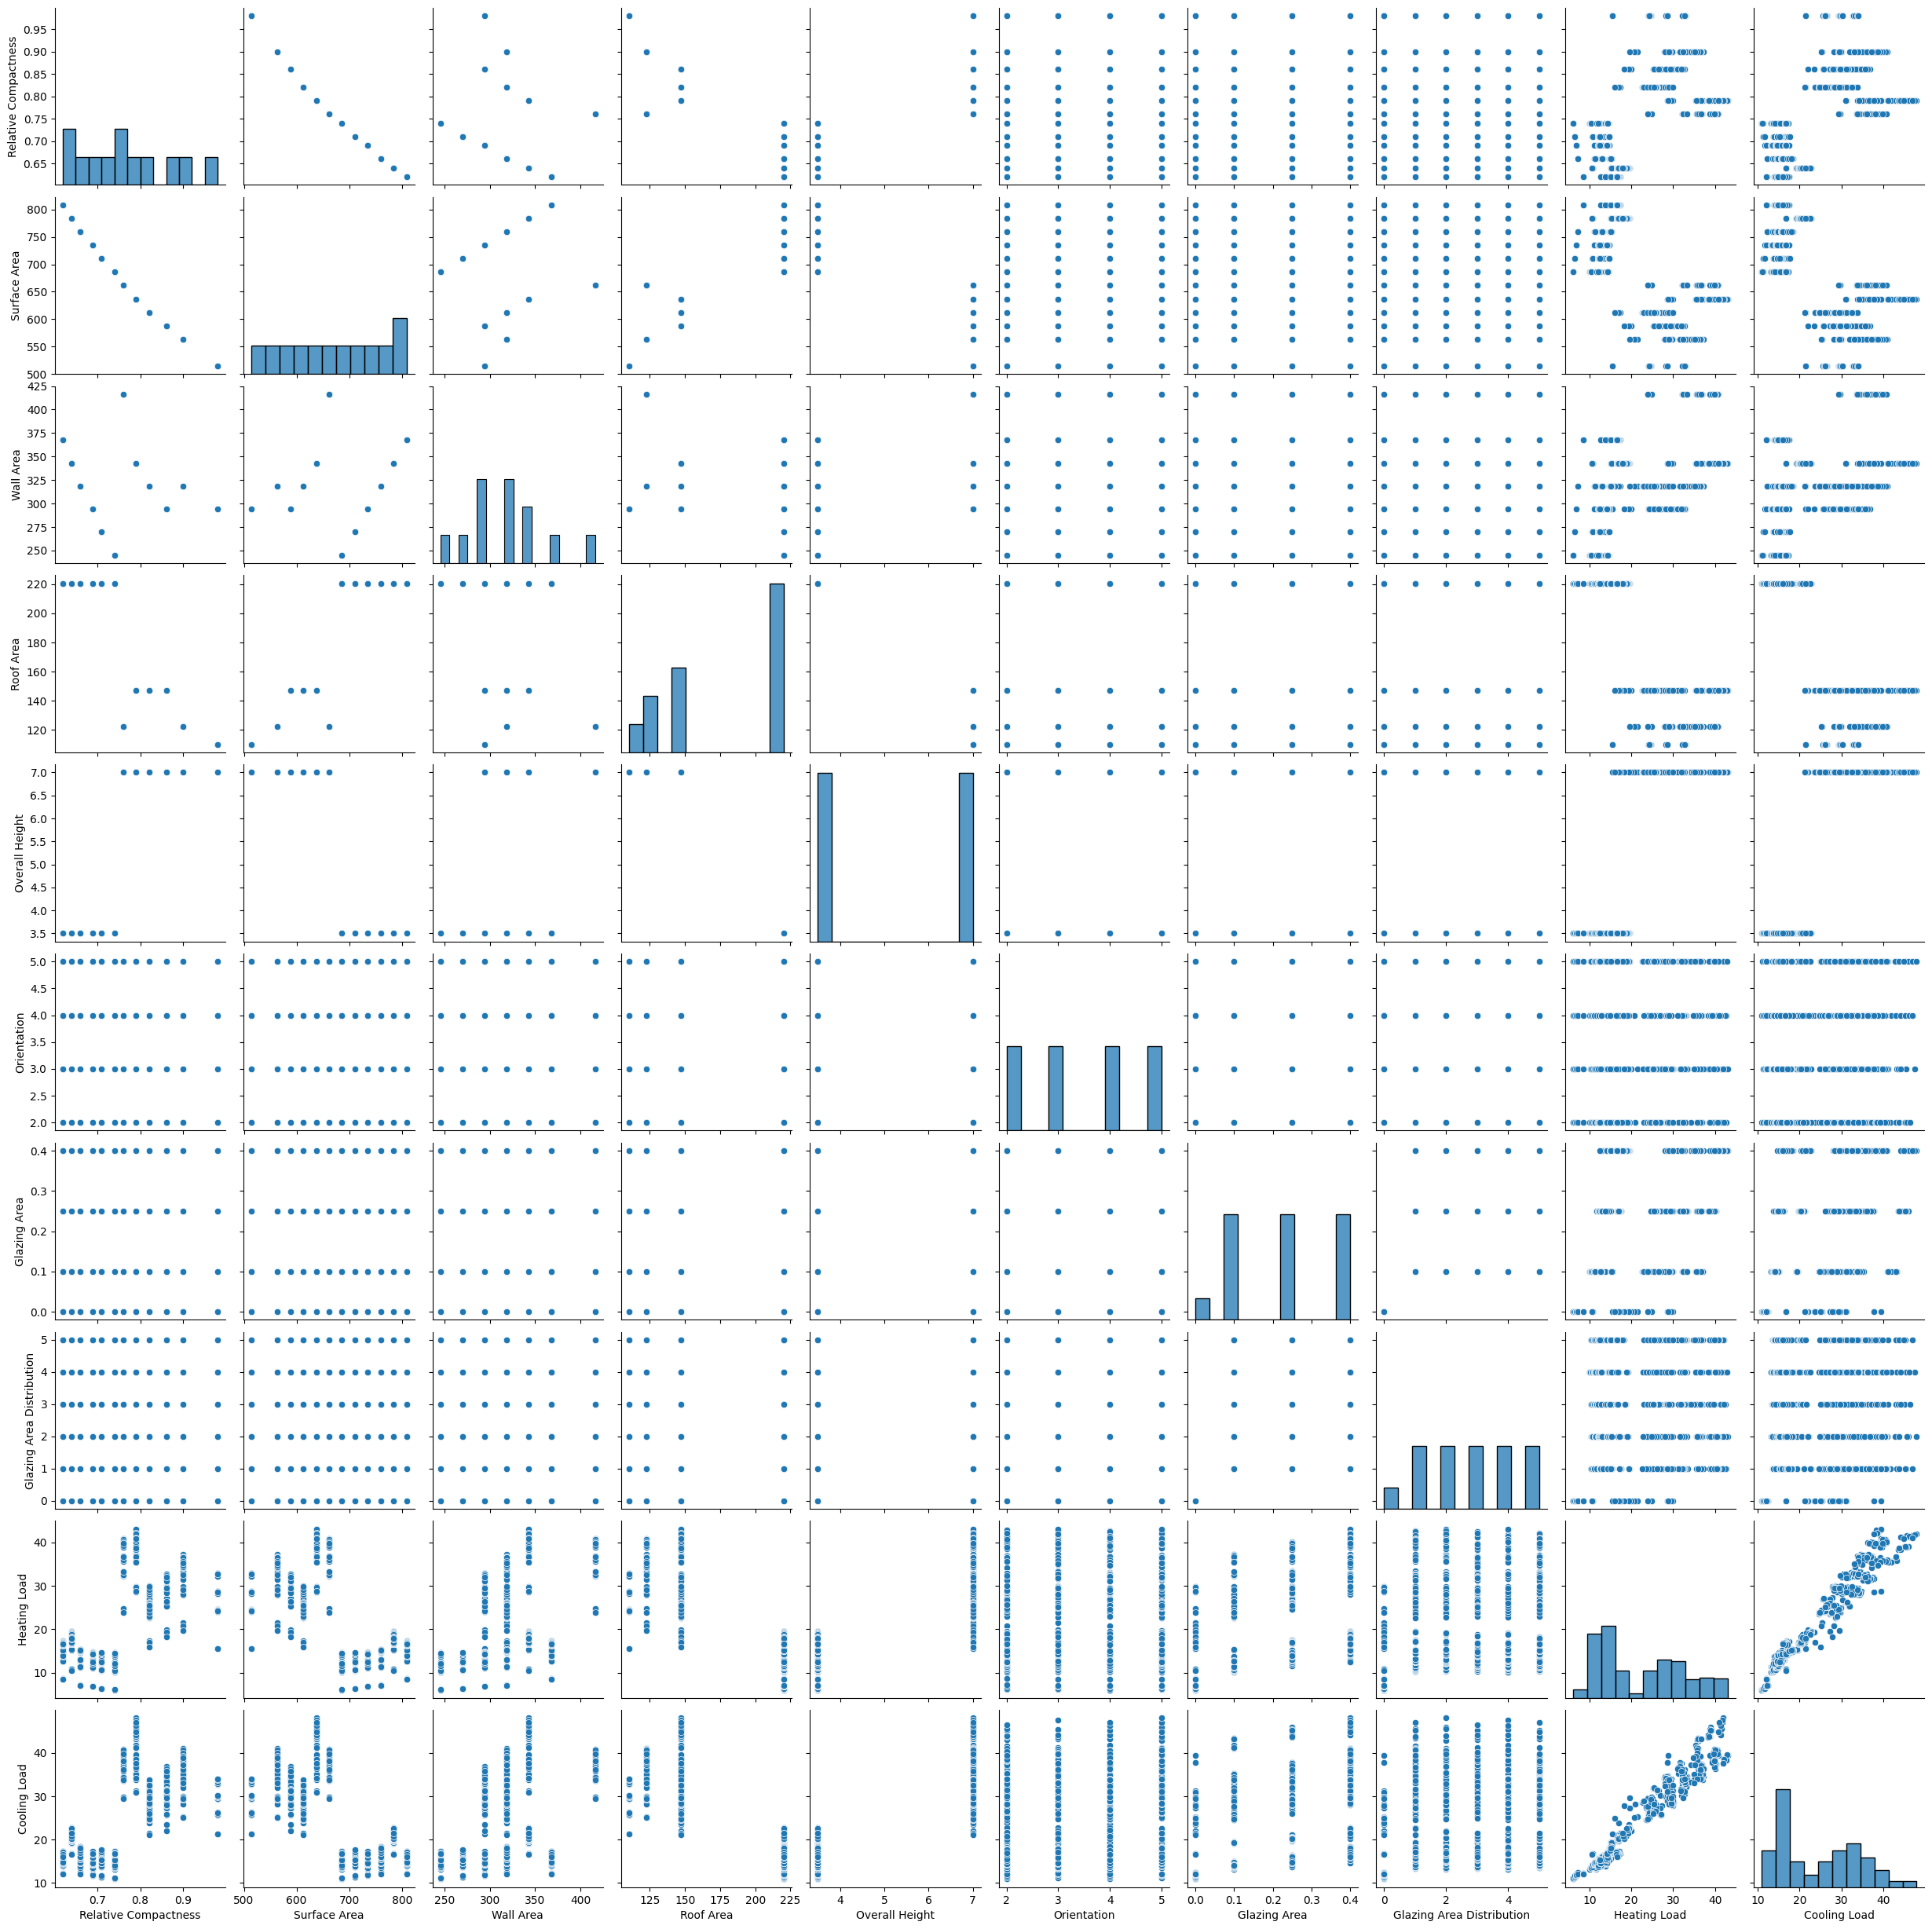

We also generally use heatmaps to learn more about the relationship between variables, find patterns, and discover correlations.

### TODO 2-1
1.  Using the seaborn `heatmap`, Generate the heatmap presenting [the correlation](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html) (`corr()`) between the independent varaibles. 
  1. Keep `annot` as 'True' and set the `fmt` parameter as '.2f'
  
* Refer the link for heatmap documentation: [link](https://seaborn.pydata.org/generated/seaborn.heatmap.html)

<Axes: >

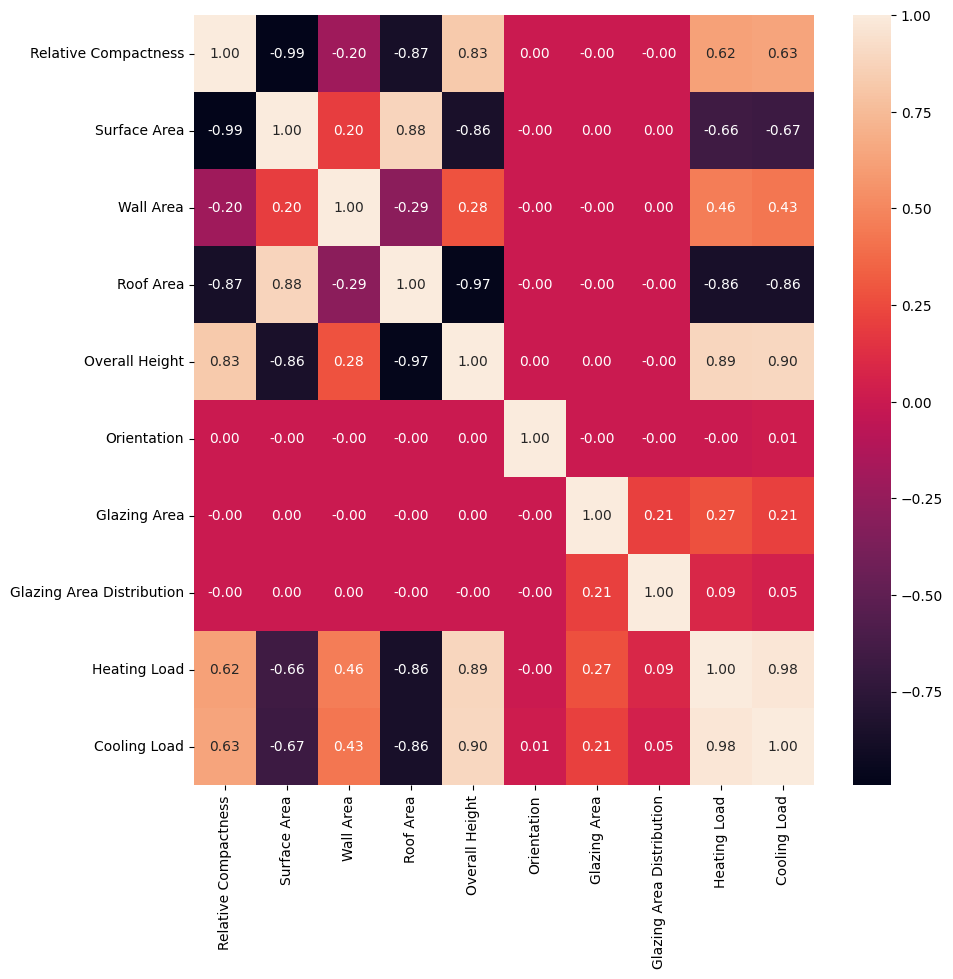

## Data Split




Now we have to split the training and testing data because it allows us to estimate the model's performance on new data and ensure that the model is not overfitting, which is when a model performs well on the training data but poorly on new data. By evaluating the model's performance on unseen data, we can get a better understanding of how well the model will perform when used in practice.


### TODO 3
1.Split the data now into 20% for testing and 80% for training, and used the previous lab code file as a reference.
1. Slice the label class to create `x_train`, `x_test`, `y_train`, and `y_test`.


,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution
661,0.66,759.5,318.5,220.50,3.5,3,0.4,3
122,0.74,686.0,245.0,220.50,3.5,4,0.1,2
113,0.79,637.0,343.0,147.00,7.0,3,0.1,2
14,0.82,612.5,318.5,147.00,7.0,4,0.0,0
529,0.98,514.5,294.0,110.25,7.0,3,0.4,1
...,...,...,...,...,...,...,...,...
25,0.74,686.0,245.0,220.50,3.5,3,0.0,0
110,0.82,612.5,318.5,147.00,7.0,4,0.1,2
149,0.90,563.5,318.5,122.50,7.0,3,0.1,3
152,0.86,588.0,294.0,147.00,7.0,2,0.1,3


,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution
9,0.86,588.0,294.0,147.0,7.0,3,0.0,0
11,0.86,588.0,294.0,147.0,7.0,5,0.0,0
19,0.79,637.0,343.0,147.0,7.0,5,0.0,0
23,0.76,661.5,416.5,122.5,7.0,5,0.0,0
28,0.71,710.5,269.5,220.5,3.5,2,0.0,0
...,...,...,...,...,...,...,...,...
746,0.74,686.0,245.0,220.5,3.5,4,0.4,5
753,0.69,735.0,294.0,220.5,3.5,3,0.4,5
754,0.69,735.0,294.0,220.5,3.5,4,0.4,5
759,0.66,759.5,318.5,220.5,3.5,5,0.4,5


,Heating Load,Cooling Load
661,15.18,17.63
122,10.32,13.57
113,37.26,34.62
14,16.95,21.16
529,32.26,33.34
...,...,...
25,6.05,11.19
110,23.67,24.80
149,29.01,32.85
152,25.41,31.73


,Heating Load,Cooling Load
9,19.95,21.97
11,18.31,27.87
19,28.75,39.44
23,23.93,29.40
28,6.37,11.27
...,...,...
746,14.17,16.94
753,14.28,15.87
754,14.37,16.54
759,15.16,18.06


,mean,std
Relative Compactness,0.764167,0.105777
Surface Area,671.708333,88.086116
Wall Area,318.500000,43.626481
Roof Area,176.604167,45.165950
Overall Height,5.250000,1.751140
Orientation,3.500000,1.118763
Glazing Area,0.234375,0.133221
Glazing Area Distribution,2.812500,1.550960
Heating Load,22.307195,10.090204
Cooling Load,24.587760,9.513306


## Normalization

When variables are measured at different scales, they often do not contribute equally to the analysis. By normalizing the variables, we can be sure that each variable contributes equally to the analysis. Standardization is a way to normalize the data as
$$ \tilde{x} = \frac{(x - \mu)}{\sigma}$$
where $x$ is the input data, $\mu$ is the mean value of the data, $\sigma$ is the standard deviation of the data, and $\tilde{x}$ is the normalized data.

In lab 2 we have seen varaibles having different ranges. If features have significantly different ranges, some features may dominate others during training.
In summary, normalization is an important preprocessing step in many machine learning algorithms, as it helps to standardize the data, improve convergence, reduce the influence of outliers, prevent overfitting, and make the features more interpretable.

## Multilayer Perceptrons

Now we are building a class for MLP model.

Classes provide a useful way of combining data and functionality. The modularity of classes enables effective troubleshooting, code reuse, and problem-solving. For example, if your code breaks, you will be able to point to a specific class or class method without having to sift through much else code.

Subclassing the `keras.Model` allows us to create a custom MLP (Multi-Layer Perceptron) model in Keras. By overriding the __init__ method, we can define the structure of the model and specify the input data, the number of outputs, the number of hidden units, and the activation function to use. This approach provides a high degree of flexibility and modularity, enabling us to tailor the model to specific requirements and easily troubleshoot and reuse the code.
The provided search results offer insights into creating custom layers and models via subclassing in Keras, as well as examples of using normalization layers to improve deep learning models. These resources can be valuable for understanding the process of building custom models and enhancing their performance through techniques such as normalization.
By leveraging the keras.Model subclassing approach, we can construct custom neural network architectures that precisely meet the needs of a given task

Now we are going to build a class for our MLP model which should takes input data and outputs predictions. 
Structure of the model: `X` (input data), `n_output` (number of outputs), `n_hidden` (number of hidden units), and `activ` (the activation function to use). 

You can refer to this link for subclass creating examples: [link](https://keras.io/api/models/model/)


### TODO 4
1. create an instance of the normalizer layer with self, and adapts it to the input data. #Refer to lab 2 for normalization
1. create the sequential network add first layer as normalizer using self 
   add two dense layer one for hidden units and one for output 
   add finally network should be summarized with "self.net.summary()".
1. Create "call" which should performs the forward pass of the network, taking the "input" as an argument and it should return the predictions made by the network.

(614, 2)

### TODO 4-1
1. Create a model using the MLP that was created above.
    1. Hint: no of output will be your no of dependent variables
    1. Hint: n_hidden is your hidden units
    

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizati  (None, 8)                 17        
 on)                                                             
                                                                 
 dense (Dense)               (None, 20)                180       
                                                                 
 dense_1 (Dense)             (None, 2)                 42        
                                                                 
Total params: 239 (960.00 Byte)
Trainable params: 222 (888.00 Byte)
Non-trainable params: 17 (72.00 Byte)
_________________________________________________________________


## Adam Optimizer

The main goal of the Adam optimizer is to enhance the training speed and performance of deep neural networks by providing adaptive learning rates and incorporating momentum. The adaptive learning rates feature allows the optimizer to adjust the learning rate for each parameter based on the history of gradients, enabling faster and more accurate convergence, particularly in high-dimensional parameter spaces. Additionally, Adam optimization combines the benefits of momentum and RMSProp algorithms, which helps in smoothing out fluctuations during the optimization process and customizing each parameter's learning rate based on its gradient history. This makes Adam a popular and effective optimization algorithm for training deep learning models, especially in domains such as computer vision and natural language processing.

With the help of momentum, we get smoothing, and with the help of rms prop, we can change learning rate in an efficient manner so that alpha rate does not go too high. As a result, they collaborated to create Adam optimizer.
reference here: [link](https://machinelearningmastery.com/adam-optimization-algorithm-for-deep-learning/)

In [ ]:
# custom metrics 
# code from https://jmlb.github.io/ml/2017/03/20/CoeffDetermination_CustomMetric4Keras/
from keras import backend as K

def coeff_determination(y_true, y_pred):
    SS_res =  K.sum(K.square( y_true-y_pred )) 
    SS_tot = K.sum(K.square( y_true - K.mean(y_true) ) ) 
    return ( 1 - SS_res/(SS_tot + K.epsilon()) )

### TODO4-2
1. Using `compile`, prepare your model to have "Adam" as an optimizer with "learning_rate" 0.01 and have a loss function to be "mean squared error" and metrics as mse , mae and coeff_determination which we have defined above.

### TODO4-3
1. Using `fit`, train the model with training data (`x_train` and `y_train`). Train the model for `300 epochs` keeping "verbose" turned off (0), and "validation_split" be 20%.

CPU times: user 1e+03 ns, sys: 1e+03 ns, total: 2 µs
Wall time: 3.1 µs


### TODO4-4
1. Create `plot_learning` function that plots the training and validation loss learning curve using the `history` argument. You can also refer to the previous lab session to complete this function.

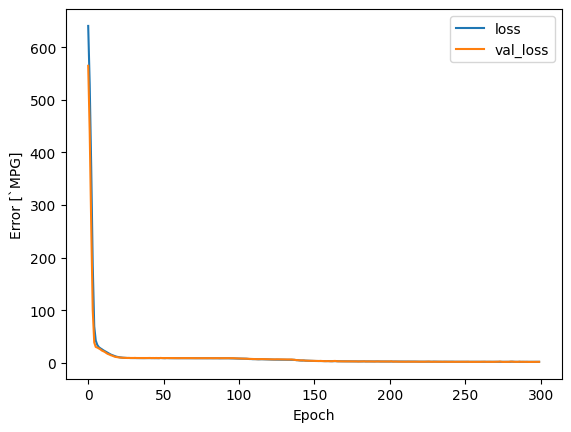

2. Plot the Coefficient of Determination and what does it signify here?

`Answer:` The coefficient of determination (R²) is a statistical measure that assesses how well a model explains and predicts an outcome in the linear regression context. It is a number between 0 and 1 that represents the proportion of the variance in the dependent variable that is predictable from the independent variable(s). A value of 1 indicates that the model perfectly predicts the outcome, while a value of 0 indicates that the model does not predict the outcome at all.

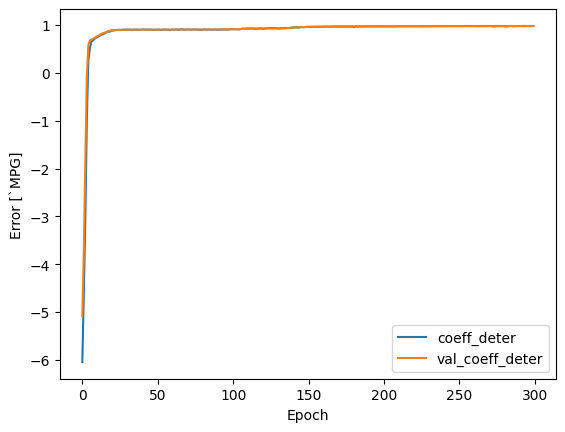

### TODO4-5
1. `evaluate` the model on test data (`x_test` and `y_test`). 

5/5 [==============================] - 0s 766us/step - loss: 2.3723 - mse: 2.3723 - mae: 1.0415 - coeff_determination: 0.9733


[2.3723042011260986,
 2.3723042011260986,
 1.0414502620697021,
 0.9732781648635864]


### TODO4-6
1. predict the model on test data (`x_test`) using `predict` function. 

5/5 [==============================] - 0s 700us/step


array([[19.95      , 20.92018127],
       [18.31      , 21.08761406],
       [28.75      , 30.18087387],
       [23.93      , 28.2881813 ],
       [ 6.37      ,  8.1610508 ],
       [ 6.85      ,  8.13810825],
       [ 7.18      ,  8.37393951],
       [10.54      , 14.14585876],
       [10.77      , 14.15837669],
       [10.56      , 14.17089176],
       [ 8.5       ,  9.96707916],
       [29.87      , 26.29132843],
       [26.91      , 23.76954269],
       [26.37      , 23.64640999],
       [32.94      , 31.13903809],
       [10.36      ,  9.43883038],
       [11.11      ,  9.59208488],
       [11.09      ,  9.56043911],
       [11.68      , 10.06578636],
       [11.7       ,  9.93774605],
       [11.69      ,  9.87372208],
       [15.21      , 15.39947224],
       [12.93      , 11.52464962],
       [13.02      , 11.49422932],
       [24.13      , 23.0432682 ],
       [24.25      , 23.03720093],
       [36.03      , 34.15252686],
       [32.41      , 31.4256134 ],
       [10.45      ,

## Visualisation

### TODO 5
Now we have to create a plot which have comparison between the actual target value and the predicted target value.
1. Plot the above numpy vertical stack array using plt.plot 
1. Use `plt.legend()` function to add a legend to the plot, with the title "target" and the labels "Label" and "Prediction".
1. Set Title using `plt.title()`, with the title being the name of the corresponding column in the y_train data.


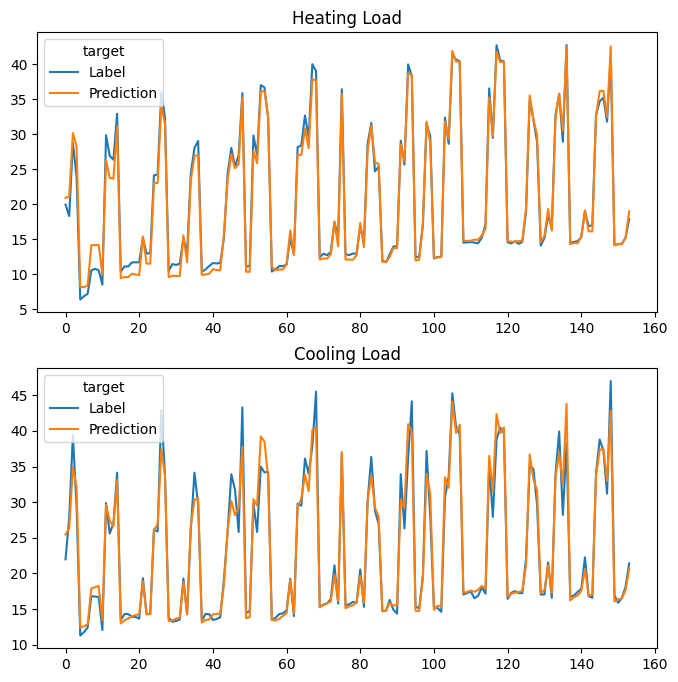



### TODO5-1
Now creates a figure with a subplot of two histograms.
Refer to the above code to write for loop and 
1. Plot the above numpy vertical stack array using `sns.histplot` keep legend as "False"
1. Use `plt.legend()` function to add a legend to the plot, with the title "target" and the labels "Label" and "Prediction".:
1. Set Title using `plt.title()`, with the title being the name of the corresponding column in the y_train data.(Hint:Use i in the )


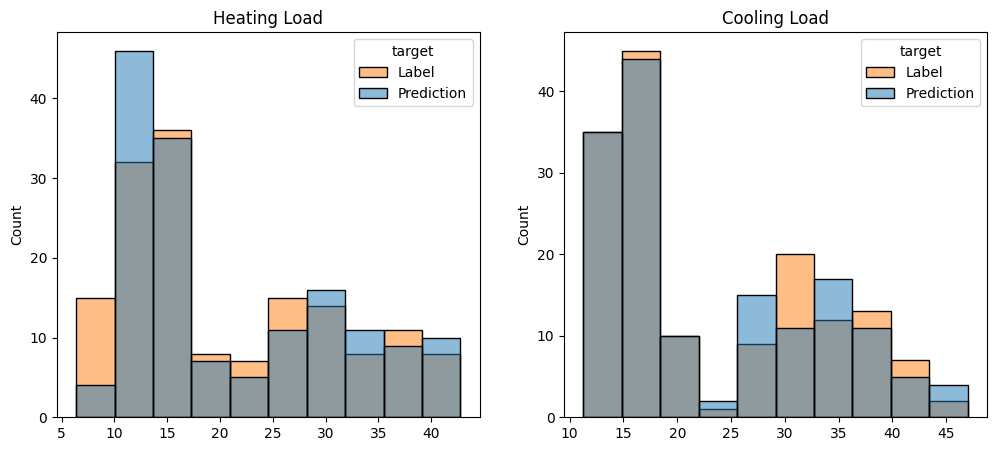

### TODO6

1. Create the same model by applying a dropout on the output of a hidden later with a rate of `0.2`.
2. Explain what does a dropout do and it's significance in the model building process.


The Dropout layer randomly sets input units to 0 with a frequency of the specified rate at each step during training time, which helps prevent overfitting. Here, it signifies that 20% of the training data would be imputed as `0`.

### Additional Practice on MNIST Data

### MNIST Dataset

The MNIST database of handwritten digits has a training set of 60,000 examples, and a test set of 10,000 examples

You can checkout the [data](https://www.tensorflow.org/datasets/catalog/mnist) over here


<img src="https://storage.googleapis.com/tfds-data/visualization/fig/mnist-3.0.1.png" width=300 />



Check the [visualisation](https://knowyourdata-tfds.withgoogle.com/#tab=STATS&dataset=mnist) of the data.



### TODO 7

The `from keras.datasets import mnist` statement is used to import the `MNIST` dataset from the `Keras` library. The MNIST dataset is a widely used dataset for training and testing machine learning models, particularly in the field of image recognition. It consists of 70,000 28x28 grayscale images of handwritten digits from 0 to 9, with 60,000 images in the training set and 10,000 images in the test set. The `mnist.load_data()` function can be used to load the dataset, and it returns the training and test data along with their corresponding labels. 

The training data consists of 60,000 samples, and the test data consists of 10,000 samples. Each sample is a 28x28 grayscale image, and the pixel values range from 0 to 255. The labels are integers ranging from 0 to 9, indicating the digit represented in the corresponding image.

1. Import the dataset using `from keras.datasets import mnist`
2. Load the dataset using `(x_train, y_train),(x_test, y_test) = mnist.load_data()`


### TODO 8
1. Count the number of unique `train` and `test` labels
2.  i. Select a random sample of 25 images from the training set.
    
    ii. Display the images in a 5x5 grid, along with their corresponding labels.

    iii. Save the visualization as an image file for reference.


Train labels:  {0: 5923, 1: 6742, 2: 5958, 3: 6131, 4: 5842, 5: 5421, 6: 5918, 7: 6265, 8: 5851, 9: 5949}

Test labels:  {0: 980, 1: 1135, 2: 1032, 3: 1010, 4: 982, 5: 892, 6: 958, 7: 1028, 8: 974, 9: 1009}


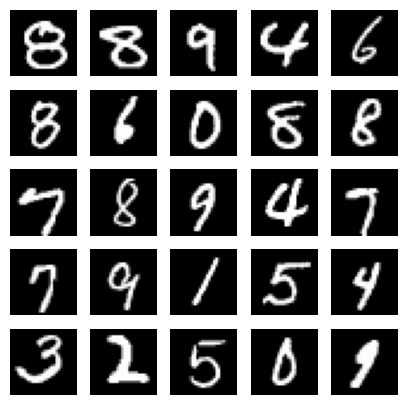



## One-Hot Encoding

At this point, the labels are in digits format, 0 to 9.

This sparse scalar representation of labels is not suitable for the neural network prediction layer that outputs probabilities per class.

A more suitable format is called a one-hot vector, a 10-dim vector with all elements 0, except for the index of the digit class.

For example, if the label is 2, the equivalent one-hot vector is [0,0,1,0,0,0,0,0,0,0]. The first label has index 0.

## Data Preprocessing

In deep learning, data is stored in tensors. The term tensor applies to a scalar (0D tensor), vector (1D tensor), matrix (2D tensor), and a multi-dimensional tensor.

The rest code computes the image dimensions, input_size of the first Dense layer and scales each pixel value from 0 to 255 to range from 0.0 to 1.0. Although raw pixel values can be used directly, it is better to normalize the input data as to avoid large gradient values that could make training difficult.

The output of the network is also normalized. After training, there is an option to put everything back to the integer pixel values by multiplying the output tensor by 255.

The proposed model is based on MLP layers. Therefore, the input is expected to be a 1D tensor. So, x_train and x_test are reshaped to [60000, 28 28] and [10000, 28 28], respectively.

### TODO 9

1. Use `to_categorical()` to convert to `one-hot` vector. [Read More](https://www.educative.io/answers/how-to-perform-one-hot-encoding-using-keras)
2. Resize and Normalize `x_train` and `x_test` using `np.reshape`

    Hint: You can use the image dimensions by assuming square of the original one, Code given below.


((60000, 28, 28), (60000, 10))

784

### TODO 10

#### Build the MLP Layer

The proposed model is made of three MLP layers.

In Keras, an MLP layer is referred to as Dense, which stands for the densely connected layer.

Both the first and second MLP layers are identical in nature with 256 units each, followed by `relu` activation and `dropout`.

256 units are chosen since 128, 512 and 1,024 units have lower performance metrics. At 128 units, the network converges quickly, but has a lower test accuracy. The added number units for 512 or 1,024 does not increase the test accuracy significantly.
Since a Dense layer is a linear operation, a sequence of Dense layers can only approximate a linear function.

The problem is that the MNIST digit classification is inherently a non-linear process. Inserting a relu activation between Dense layers will enable MLPs to model non-linear mappings.

`relu or Rectified Linear Unit (ReLU)` is a simple non-linear function. It allows positive inputs to pass through unchanged while clamping everything else to zero.

 Hint: model is a 3-layer MLP with `ReLU` and `dropout` after each layer and no `dropout` in the `output` layer

1. Set the network parameters,  `hidden_units` = 256, 
`dropout` = 0.45
2. Build the Model and view the Model Summary using `model.summary()`


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 256)               200960    
                                                                 
 activation (Activation)     (None, 256)               0         
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_3 (Dense)             (None, 256)               65792     
                                                                 
 activation_1 (Activation)   (None, 256)               0         
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_4 (Dense)             (None, 10)               

### TODO 11

The above listing shows the model summary of the proposed network. It requires a total of 269,322 parameters.

This is substantial considering that we have a simple task of classifying MNIST digits. So, MLPs are not parameter efficient.

The total number of parameters required can be computed as follows:

From input to Dense layer: 784 × 256 + 256 = 200,960.

From first Dense to second Dense: 256 × 256 + 256 = 65,792.

From second Dense to the output layer: 10 × 256 + 10 = 2,570.

The total is 200,690 + 65,972 + 2,570 = 269,322.

1. Using `plot_model()` verify the network.

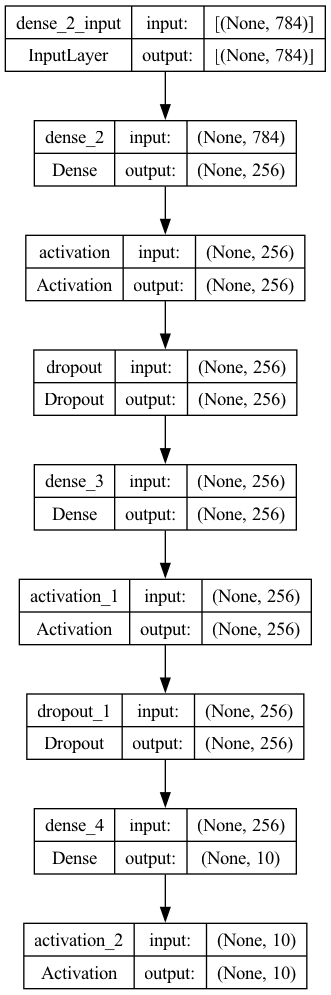

`Loss function (categorical_crossentropy)`
How far the predicted tensor is from the one-hot ground truth vector is called loss.

In this example, we use categorical_crossentropy as the loss function. It is the negative of the sum of the product of the target and the logarithm of the prediction.

There are other loss functions in Keras, such as mean_absolute_error and binary_crossentropy. The choice of the loss function is not arbitrary but should be a criterion that the model is learning.

For classification by category, categorical_crossentropy or mean_squared_error is a good choice after the softmax activation layer. The binary_crossentropy loss function is normally used after the sigmoid activation layer while mean_squared_error is an option for tanh output.

`Optimization (optimizer adam)`
With optimization, the objective is to minimize the loss function. The idea is that if the loss is reduced to an acceptable level, the model has indirectly learned the function mapping input to output.

In Keras, there are several choices for optimizers. The most commonly used optimizers are; Stochastic Gradient Descent (SGD), Adaptive Moments (Adam) and Root Mean Squared Propagation (RMSprop).

Each optimizer features tunable parameters like learning rate, momentum, and decay.

Adam and RMSprop are variations of SGD with adaptive learning rates. In the proposed classifier network, Adam is used since it has the highest test accuracy.

`Metrics (accuracy)`
Performance metrics are used to determine if a model has learned the underlying data distribution. The default metric in Keras is loss.

During training, validation, and testing, other metrics such as accuracy can also be included.

Accuracy is the percent, or fraction, of correct predictions based on ground truth.

### TODO 12

1. Using `compile` the model with above listed parameters.

(60000, 784)

(60000, 10)

### TODO 13

1. Using `fit`, train the model and use `batch_size = 128`.

Epoch 1/20


469/469 [==============================] - 1s 2ms/step - loss: 0.4216 - accuracy: 0.8697
Epoch 2/20
469/469 [==============================] - 1s 2ms/step - loss: 0.1957 - accuracy: 0.9412
Epoch 3/20
469/469 [==============================] - 1s 2ms/step - loss: 0.1529 - accuracy: 0.9539
Epoch 4/20
469/469 [==============================] - 1s 2ms/step - loss: 0.1300 - accuracy: 0.9601
Epoch 5/20
469/469 [==============================] - 1s 2ms/step - loss: 0.1144 - accuracy: 0.9658
Epoch 6/20
469/469 [==============================] - 1s 2ms/step - loss: 0.1023 - accuracy: 0.9680
Epoch 7/20
469/469 [==============================] - 1s 2ms/step - loss: 0.0930 - accuracy: 0.9714
Epoch 8/20
469/469 [==============================] - 1s 2ms/step - loss: 0.0902 - accuracy: 0.9712
Epoch 9/20
469/469 [==============================] - 1s 2ms/step - loss: 0.0825 - accuracy: 0.9743
Epoch 10/20
469/469 [==============================] - 1s 2ms/step - loss: 0.0775 - accuracy: 0.9750
Epoch 11/2

### TODO 14

1. Evaluate the models performance using `evaluate`

79/79 [==============================] - 0s 1ms/step - loss: 0.0605 - accuracy: 0.9824

Test accuracy: 98.2%


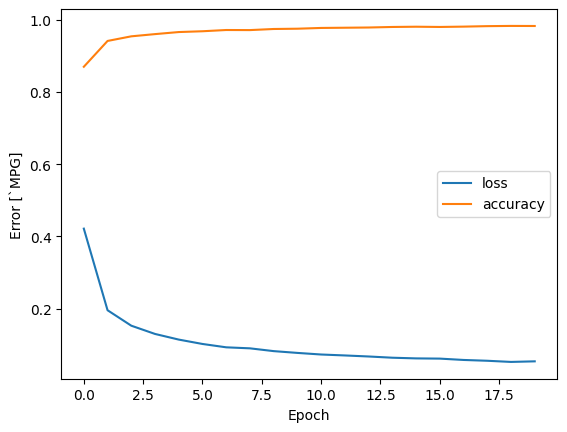